<a href="https://colab.research.google.com/github/hack2050/hack2050/blob/main/Flor_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


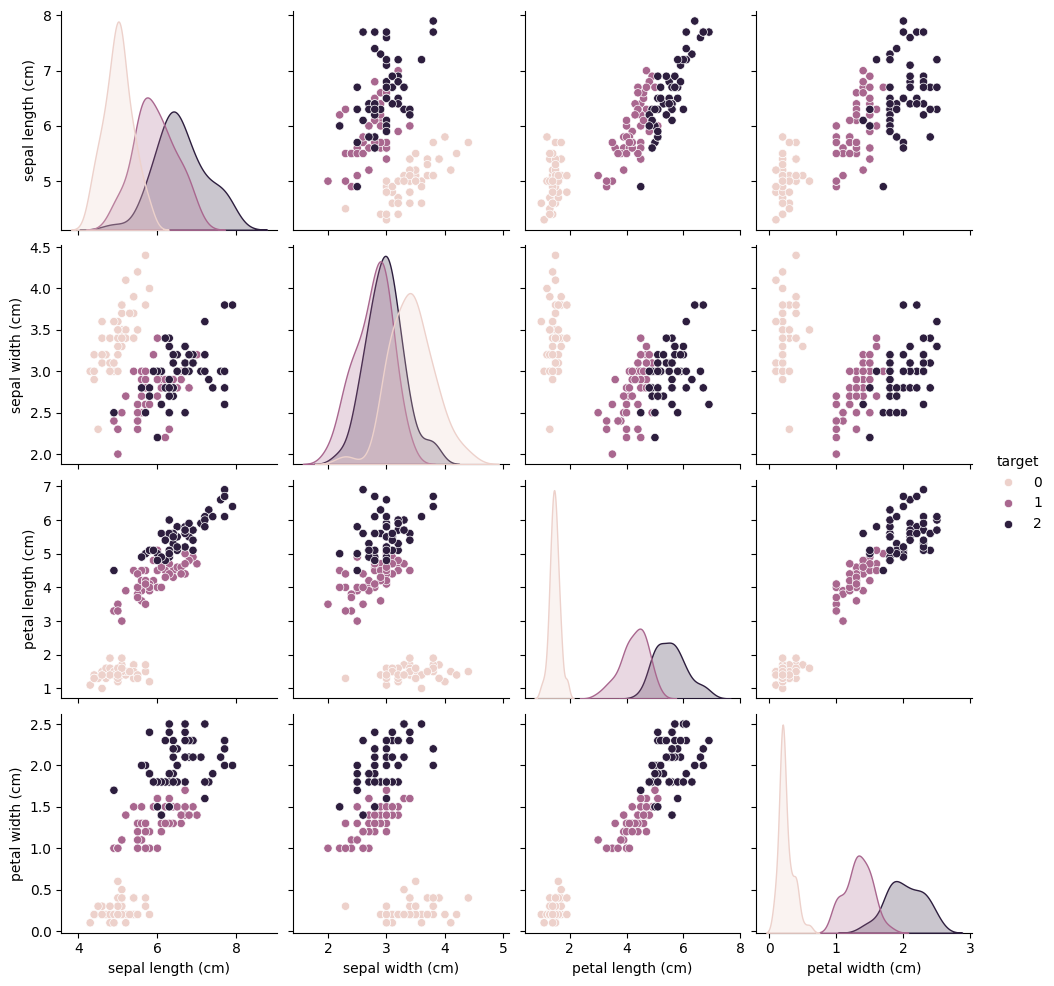

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo para DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Visualizando os dados
sns.pairplot(iris_df, hue='target')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Modelo:", accuracy)


Acurácia do Modelo: 1.0


In [ ]:
new_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn.predict(new_data)
print("Previsão para o novo dado:", iris.target_names[prediction[0]])


Previsão para o novo dado: setosa


In [ ]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


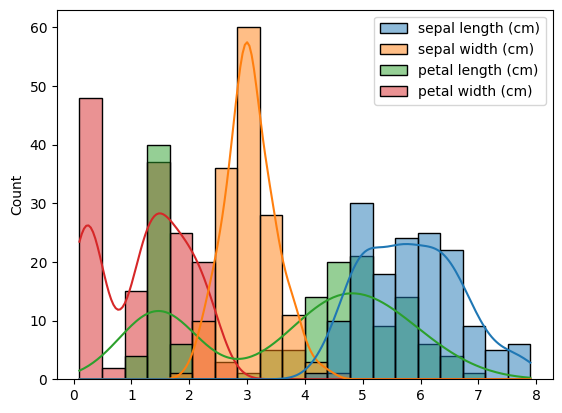

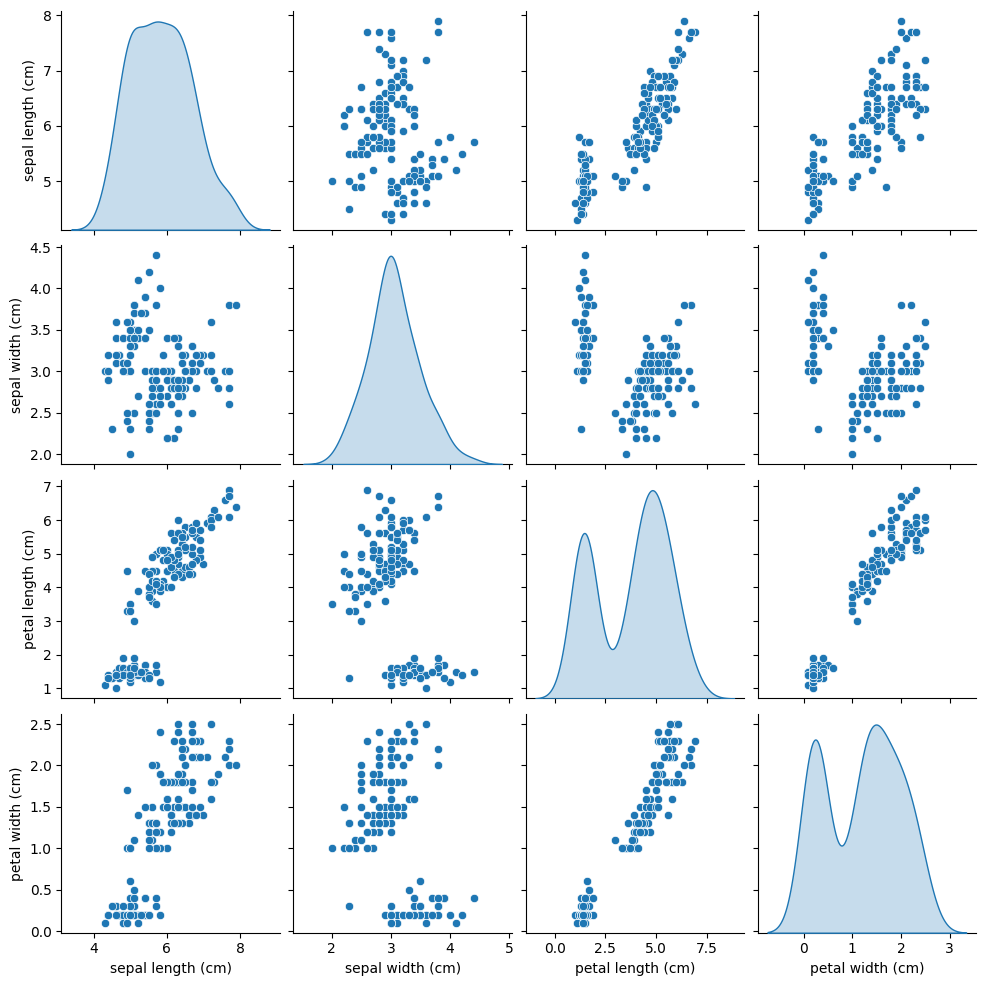

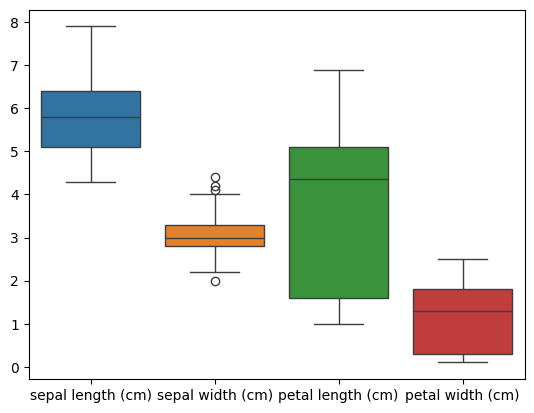

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada atributo
sns.histplot(iris_df, bins=20, kde=True)
plt.show()

# Gráfico de dispersão para pares de atributos
sns.pairplot(iris_df, diag_kind='kde')
plt.show()

# Boxplot para cada atributo
sns.boxplot(data=iris_df)
plt.show()


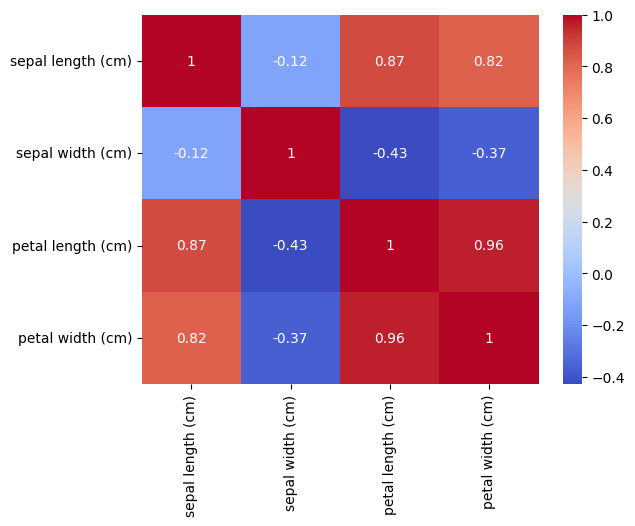

In [ ]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Decision Tree Accuracy: 1.0
KNN Accuracy: 1.0
SVM Accuracy: 1.0
Naive Bayes Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10, 100]
}

# Crie um objeto GridSearchCV para SVM
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Best Model:", accuracy)


Accuracy of Best Model: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, iris.data, iris.target, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean CV Accuracy: 0.9800000000000001


# **Projeto de Classificação da Flor Iris**

#### Visão Geral:
O projeto de classificação da flor Iris tem como objetivo desenvolver um modelo de aprendizado de máquina capaz de classificar corretamente a espécie de uma flor Iris com base em suas características morfológicas, como comprimento e largura das sépalas e pétalas. Essa classificação é um problema clássico em aprendizado de máquina e serve como um ótimo ponto de partida para iniciantes na área.

#### Dados Utilizados:
Os dados utilizados neste projeto consistem em medidas de comprimento e largura das sépalas e pétalas de três espécies diferentes de flores Iris: setosa, versicolor e virginica. O conjunto de dados é composto por 150 amostras, com 50 amostras para cada espécie. Cada amostra é representada por quatro atributos numéricos.

#### Abordagem:
1. **Exploração de Dados**: Iniciamos o projeto explorando os dados, calculando estatísticas descritivas, visualizando a distribuição dos dados e investigando possíveis correlações entre os atributos.
   
2. **Seleção de Modelo**: Experimentamos vários modelos de classificação, incluindo Árvores de Decisão, K-Nearest Neighbors, Support Vector Machines, entre outros, e avaliamos o desempenho de cada modelo utilizando métricas de avaliação apropriadas.

3. **Otimização de Hiperparâmetros**: Utilizamos técnicas de busca em grade para encontrar os melhores hiperparâmetros para cada modelo, a fim de melhorar ainda mais o desempenho do modelo.

4. **Avaliação do Modelo**: Avaliamos o desempenho do modelo otimizado nos dados de teste e realizamos validação cruzada para verificar a estabilidade do desempenho do modelo em diferentes divisões dos dados.

#### Resultados Alcançados:
Após a implementação e avaliação dos modelos, identificamos o modelo otimizado que apresentou o melhor desempenho na classificação das flores Iris. O modelo foi capaz de classificar com precisão a espécie de uma flor Iris com base em suas características morfológicas.
#### Conclusão:
O projeto de classificação da flor Iris demonstra a aplicação prática de técnicas de aprendizado de máquina na classificação de espécies de plantas com base em características morfológicas.:
